# In this notebook 
We will optimize Adaptive Exponential Integrate and Fire Model and Izhikevich Model 
allen data against some Allen Experimental data.


# TODO make a nested Genetic Algorithm where the outer loop explores different preferred currents.

This will get rid of the oscillations.

In [1]:
from neuronunit.allenapi.allen_data_driven import opt_setup, opt_setup_two, opt_exec, opt_to_model
from neuronunit.optimization.optimization_management import check_bin_vm15
from neuronunit.optimization.model_parameters import MODEL_PARAMS, BPO_PARAMS, to_bpo_param
from neuronunit.optimization.optimization_management import dtc_to_rheo,inject_and_plot_model
from bluepyopt.allenapi.allen_data_driven import opt_to_model
from utils import dask_map_function
import matplotlib.pyplot as plt
import numpy as np
from neuronunit.optimization.data_transport_container import DataTC
import efel
from jithub.models import model_classes

import quantities as qt


ids = [ 324257146,
        325479788,
        476053392,
        623893177,
        623960880,
        482493761,
        471819401
       ]

specimen_id = ids[1]
efel.__file__
efel_list = list(efel.getFeatureNames());
cellmodel = "IZHI"

/home/user/anaconda3/lib/python3.7/site-packages/cerberus/validator.py:1609: UserWarning: No validation schema is defined for the arguments of rule 'not_zero_obs_zscore'
  "'%s'" % method_name.split('_', 2)[-1]
/home/user/anaconda3/lib/python3.7/site-packages/airspeed/__init__.py:505: FutureWarning: Possible nested set at position 8
  KEYVALSEP = re.compile(r'[ \t]*:[[ \t]*(.*)$', re.S)
test


In [2]:

#cellmodel = "ADEXP";
if cellmodel == "IZHI":
    model = model_classes.IzhiModel()
if cellmodel == "MAT":
    model = model_classes.MATModel()
if cellmodel == "ADEXP":
    model = model_classes.ADEXPModel()



specimen id 623960880 \\
{\small  
\url{http://celltypes.brain-map.org/mouse/experiment/electrophysiology/623960880}
specimen id 623893177 \\
\url{http://celltypes.brain-map.org/mouse/experiment/electrophysiology/623893177}
specimen id 482493761 \\
\url{http://celltypes.brain-map.org/mouse/experiment/electrophysiology/482493761}
specimen id 471819401 \\
\url{http://celltypes.brain-map.org/mouse/experiment/electrophysiology/471819401}


In [3]:
#'sag_ratio2_1.5x',
#'ohmic_input_resistance_1.5x',
#'sag_ratio2_1.5x',

    

In [4]:
specific_filter_list = ['ISI_log_slope_1.5x',
                        'mean_frequency_1.5x',
                        'adaptation_index2_1.5x',
                        'first_isi_1.5x',
                        'ISI_CV_1.5x',
                        'median_isi_1.5x',
                        'Spikecount_1.5x',
                        'all_ISI_values',
                        'ISI_values',
                        'time_to_first_spike',
                        'time_to_last_spike',
                        'time_to_second_spike',
                        'spike_times',
                        'AHP_depth_abs_1.5x',
                        'peak_voltage_1.5x',
                        'voltage_base_1.5x',
                        'voltage']
simple_yes_list = specific_filter_list
target_num_spikes = 8


In [5]:
dtc = DataTC()
dtc.backend = cellmodel
dtc._backend = model._backend

dtc.attrs = model.attrs
dtc.params = {k:np.mean(v) for k,v in MODEL_PARAMS[cellmodel].items()}
dtc.attrs

{'C': 89.7960714285714,
 'a': 0.01,
 'b': 15,
 'c': -60,
 'd': 10,
 'k': 1.6,
 'vPeak': 21.138338933982595,
 'vr': -65.2261863636364,
 'vt': -50,
 'celltype': 3}

In [6]:
model = dtc.dtc_to_model()
model.attrs



dir(model)
#vm = model._backend.get_membrane_potential()
#vm = model.get_membrane_potential()#
print(model.backend)

JIT_IZHIBackend


In [7]:
model.params

{'C': <bluepyopt.parameters.Parameter at 0x7f5373fd9790>,
 'a': <bluepyopt.parameters.Parameter at 0x7f5373fd97d0>,
 'b': <bluepyopt.parameters.Parameter at 0x7f5373fd9610>,
 'c': <bluepyopt.parameters.Parameter at 0x7f5373fd96d0>,
 'd': <bluepyopt.parameters.Parameter at 0x7f5373fd9650>,
 'k': <bluepyopt.parameters.Parameter at 0x7f5373fd9690>,
 'vPeak': <bluepyopt.parameters.Parameter at 0x7f5373fd95d0>,
 'vr': <bluepyopt.parameters.Parameter at 0x7f5373fd9550>,
 'vt': <bluepyopt.parameters.Parameter at 0x7f5373fd9510>,
 'celltype': <bluepyopt.parameters.Parameter at 0x7f5373fd99d0>}

In [8]:


dtc = dtc_to_rheo(dtc)
print(dtc.rheobase)
print(dtc.backend)


#dtc_to_rheo()

122.5711024730117 pA
IZHI


<Figure size 432x288 with 0 Axes>

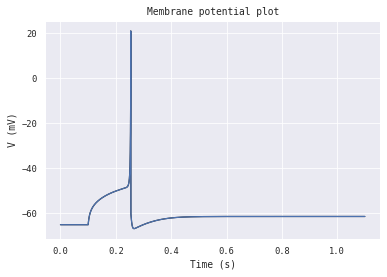

122.5711024730117 pA


In [9]:
vm,plt,dtc = inject_and_plot_model(dtc,plotly=False)
plt.show()
print(dtc.rheobase)


In [10]:
fixed_current = 122 *qt.pA
model.params

{'C': <bluepyopt.parameters.Parameter at 0x7f5373fd9790>,
 'a': <bluepyopt.parameters.Parameter at 0x7f5373fd97d0>,
 'b': <bluepyopt.parameters.Parameter at 0x7f5373fd9610>,
 'c': <bluepyopt.parameters.Parameter at 0x7f5373fd96d0>,
 'd': <bluepyopt.parameters.Parameter at 0x7f5373fd9650>,
 'k': <bluepyopt.parameters.Parameter at 0x7f5373fd9690>,
 'vPeak': <bluepyopt.parameters.Parameter at 0x7f5373fd95d0>,
 'vr': <bluepyopt.parameters.Parameter at 0x7f5373fd9550>,
 'vt': <bluepyopt.parameters.Parameter at 0x7f5373fd9510>,
 'celltype': <bluepyopt.parameters.Parameter at 0x7f5373fd99d0>}

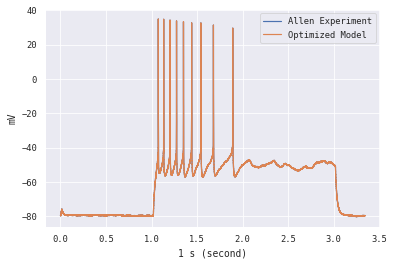

In [11]:
model.params
model.backend
model, suite, nu_tests, target_current, spk_count = opt_setup(specimen_id,
                                                              cellmodel,
                                                              target_num_spikes,provided_model=model,fixed_current=False)


In [12]:
suite.tests[-1].observation

{'mean': 1.891995, 'std': 1.891995}

In [13]:
target_current


{'value': array(209.17493939) * pA}

In [ ]:
model.seeded_current = target_current['value']
model.allen = True
model.seeded_current
model.NU = True
cell_evaluator,simple_cell = opt_setup_two(model,cellmodel, suite, nu_tests, target_current, spk_count,provided_model=model)
NGEN = 350
MU = 20

mapping_funct = dask_map_function
final_pop, hall_of_fame, logs, hist = opt_exec(MU,NGEN,mapping_funct,cell_evaluator)

IzhiModel <jithub.models.backends.izhikevich.JIT_IZHIBackend object at 0x7f53735ad390>
IzhiModel <jithub.models.backends.izhikevich.JIT_IZHIBackend object at 0x7f53735ad390>


gen	nevals	avg    	std    	min    	max  
1  	20    	3114.12	7293.74	12.8708	22000


2  	17    	2295.39	6178.74	12.8708	22000
3  	15    	1815.32	5833.12	12.8708	22000
4  	10    	13.9364	1.50726	11.8612	16.4778
5  	15    	3318.45	7486.87	11.8612	22000  
6  	12    	49.0718	126.128	11.8612	485.987
7  	16    	13.1156	0.584058	11.8612	14.5317
8  	13    	32.0078	96.3053 	11.8612	513.529


In [ ]:
target_current

In [ ]:

opt,target = opt_to_model(hall_of_fame,cell_evaluator,suite, target_current, spk_count)

In [ ]:
best_ind = hall_of_fame[0]
fitnesses = cell_evaluator.evaluate_with_lists(best_ind)
fitnesses;

In [ ]:
best_ind

In [ ]:
obnames = [obj.name for obj in cell_evaluator.objectives]

for i,j in zip(fitnesses,obnames):
    print(i,j)

In [ ]:
#for obj in cell_evaluator2.objectives:
#    print(obj.name)

gen_numbers = logs.select('gen')
min_fitness = logs.select('min')
max_fitness = logs.select('max')
avg_fitness = logs.select('avg')
plt.plot(gen_numbers, max_fitness, label='max fitness')
plt.plot(gen_numbers, avg_fitness, label='avg fitness')
plt.plot(gen_numbers, min_fitness, label='min fitness')

plt.plot(gen_numbers, min_fitness, label='min fitness')
plt.semilogy()
plt.xlabel('generation #')
plt.ylabel('score (# std)')
plt.legend()
plt.xlim(min(gen_numbers) - 1, max(gen_numbers) + 1)
plt.show()

In [ ]:
plt.plot(gen_numbers, max_fitness, label='max fitness')
plt.show()

In [ ]:
opt.attrs
#opt.attrs['a'] = 0.0
#opt.attrs['b'] = 0.0

#opt.attrs['v_rest'] = -60
#opt.attrs['tau_w'] = 0.05
#opt.attrs['cm'] = 1

opt.vm15 = None
from neuronunit.optimization.optimization_management import inject_model30
#vm15,_,_,opt = inject_model30(opt)
vm15,_,_,opt=inject_model30(opt,solve_for_current=target_current)

model = opt.dtc_to_model()

plt.plot(opt.vm15.times,opt.vm15)
opt.vm15
model.attrs
model.backend

In [ ]:

import matplotlib.pyplot as plt

plt.plot(opt.vm15.times,opt.vm15)
plt.show()


opt.attrs


In [ ]:
opt.vm15.units

#opt.vm15 = opt.vm15.rescale('mV').magnitude


In [ ]:
target_current

In [ ]:
target.vm15 = suite.traces['vm15']

plt.plot(target.vm15.times,target.vm15)
plt.show()


In [ ]:
target.vm15 = suite.traces['vm15']
#opt.attrs['a'] = 0.0
#opt.attrs['vr'] = -80
check_bin_vm15(target,opt)
opt.attrs



In [ ]:
'''
import bluepyopt as bpop
from utils import dask_map_function
optimisation = bpop.optimisations.DEAPOptimisation(
        evaluator=cell_evaluator2,
        offspring_size = MU,
        map_function = dask_map_function,
        selector_name='IBEA',mutpb=0.1,cxpb=0.35,seeded_pop=[cp['final_pop'],cp['hall_of_fame']])#,seeded_current=target_current)
final_pop, hall_of_fame, logs, hist = optimisation.run(max_ngen=50)
'''

In [ ]:
gen_numbers = logs.select('gen')
min_fitness = logs.select('min')
max_fitness = logs.select('max')
avg_fitness = logs.select('avg')
plt.plot(gen_numbers, max_fitness, label='max fitness')
plt.plot(gen_numbers, avg_fitness, label='avg fitness')
plt.plot(gen_numbers, min_fitness, label='min fitness')

plt.plot(gen_numbers, min_fitness, label='min fitness')
#plt.semilogy()
plt.xlabel('generation #')
plt.ylabel('score (# std)')
plt.legend()
plt.xlim(min(gen_numbers) - 1, max(gen_numbers) + 1)
plt.show()
